In [1]:
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
class Kmeans():
    """
        Docstring.

        Kmeans Algorithm.

        Parameters:
        K(int): Number of groups to be found
        random_start(int): Number of random starts

        Returns:
        centers(Array): K centers found
        groups(Array): Group of each data point

    """
    @staticmethod
    def costFunction(X, centers, groups):
        m = len(X)
        cost = 0
        for i in range(m):
            cost += Kmeans.euclianDistance(X[i,:].reshape((1,-1)),centers[groups[i],:].reshape((1,-1)))[0][0]
        return cost/m
    @staticmethod
    def euclianDistance(a,b):
        distances = np.zeros((len(a),len(b)))
        for i in range(len(a)):
            for j in range(len(b)):
                distances[i][j] = np.linalg.norm(a[i,:]-b[j,:],axis = 0)
        return distances
    def __init__(self,K, random_start = 1, epochs = 100):
        self.K = K
        self.random_start = random_start
        self.epoch = epochs
        self.centers = 0
        self.groups = 0
    def fit(self,X):
        costs = []
        groupsList = []
        centersList = []
        for nSt in range(self.random_start):
            #Random initializing centers
            initmean = np.random.choice(range(len(X)), size = self.K,replace = False)
            centers = X[initmean]
            for e in range(self.epoch):
                # print(f"Iteration: {e}")
                distances = Kmeans.euclianDistance(X,centers)
                groups = np.argwhere((distances == distances.min(axis = 1,keepdims = True)))[:,1]
                #Update centers with mean
                for i in range(self.K):
                    centers[i,:] = (X[groups == i]).mean(axis = 0)
            cost = Kmeans.costFunction(X, centers, groups)
            costs.append(cost)
            groupsList.append(groups)
            centersList.append(centers)
            print(f"Start{nSt} - Cost: {cost} - Best {min(costs)}")
        self.centers = centersList[costs.index(min(costs))]
        self.groups = groupsList[costs.index(min(costs))]



Text(0, 0.5, 'X2')

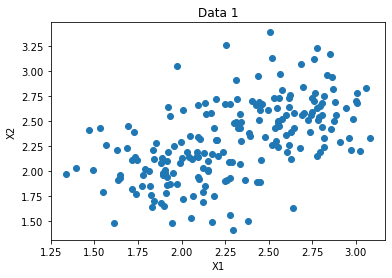

In [3]:
#Data 1 

np.random.seed(2)
size = 100
X1 = np.random.randn(size,2)*0.25 + 2
X2 = np.random.randn(size,2)*0.25 + 2.6
X = np.concatenate([X1,X2], axis = 0)
plt.scatter(X[:,0],X[:,1])
plt.title('Data 1')
plt.xlabel('X1')
plt.ylabel('X2')



Start0 - Cost: 0.31624163966634977 - Best 0.31624163966634977
Start1 - Cost: 0.3163566729600727 - Best 0.31624163966634977
Start2 - Cost: 0.3163566729600727 - Best 0.31624163966634977
Start3 - Cost: 0.3163566729600727 - Best 0.31624163966634977
Start4 - Cost: 0.3163566729600727 - Best 0.31624163966634977


Text(0, 0.5, 'X2')

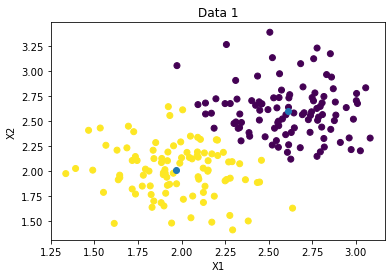

In [4]:
model = Kmeans(K = 2, random_start= 5)
model.fit(X)
plt.scatter(X[:,0],X[:,1], c = model.groups)
plt.scatter(model.centers[:,0], model.centers[:,1])
plt.title('Data 1')
plt.xlabel('X1')
plt.ylabel('X2')



Text(0, 0.5, 'X2')

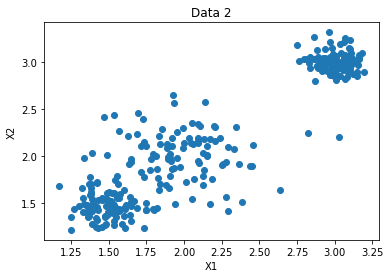

In [5]:
#Data 2 

np.random.seed(2)
size = 100
X1 = np.random.randn(size,2)*0.25 + 2
X2 = np.random.randn(size,2)*0.1 + 3
X3 = np.random.randn(size,2)*0.13 + 1.5
X = np.concatenate([X1,X2,X3], axis = 0)
plt.scatter(X[:,0],X[:,1])
plt.title('Data 2')
plt.xlabel('X1')
plt.ylabel('X2')


Start0 - Cost: 0.20217929968803916 - Best 0.20217929968803916
Start1 - Cost: 0.20217929968803916 - Best 0.20217929968803916
Start2 - Cost: 0.20217929968803916 - Best 0.20217929968803916
Start3 - Cost: 0.20217929968803916 - Best 0.20217929968803916
Start4 - Cost: 0.20217929968803916 - Best 0.20217929968803916


Text(0, 0.5, 'X2')

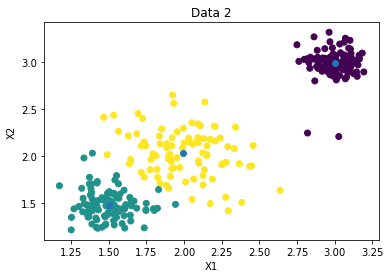

In [6]:
model = Kmeans(K = 3, random_start= 5)
model.fit(X)
plt.scatter(X[:,0],X[:,1], c = model.groups)
plt.scatter(model.centers[:,0], model.centers[:,1])
plt.title('Data 2')
plt.xlabel('X1')
plt.ylabel('X2')
